In [1]:
# Christopher Figueroa
# Aircraft Health LSWM predictor

# imports for Yes or No predictor
# source: datajungler.com
import numpy as np, pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt 

# original intended source of data
train_data = pd.read_csv("Maintenance.csv")

# everything has been copied in this document from datajungler
# the purpose of this program is to test to see if the code works
# however it does not work as intended
# perhaps there are some other changes needed to accomodate the .csv file
# but there is no time

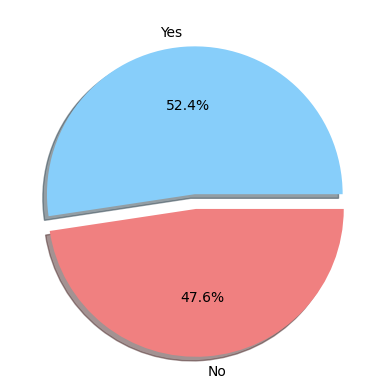

In [2]:
# data visualization
renewal_prop =  train_data['Maintenance'].value_counts()
plt.pie(renewal_prop, explode=(0,0.1), labels=["Yes", "No"],
        colors=["lightskyblue", "lightcoral"], radius=1, autopct='%1.1f%%',
        shadow=True)
plt.show()

In [3]:
# split the data into input and target variables
train_input = train_data[[i for i in range(0,5)]].values  # turn dataframe to list
le = preprocessing.LabelEncoder()  # call LabelEncoder from the class: preprocessing
train_target = le.fit_transform(train_data[[5]].values)  # assign and transform to label number to each class


classifier = linear_model.LogisticRegression(C=1)  # Default: fit_intercept=True, C=1.0
classifier.fit(train_input, train_target)

accuracy = classifier.score(train_input, train_target)  # score is accuracy rate
print ("Intercept: ", classifier.intercept_)
print ("Coefficient: ", classifier.coef_)
print ("Classification Rate: {0:.0f}%".format(accuracy*100))

KeyError: "None of [Int64Index([0, 1, 2, 3, 4], dtype='int64')] are in the [columns]"

In [ ]:
# plot scatter for x3 and x4
i=4  # set the column index to i
weight = classifier.coef_[0]
yes_data = train_data[train_data['renewal']=='Y']
no_data = train_data[train_data['renewal']=='N']
plt.figure()
plt.scatter(yes_data[[i]], yes_data[[i+1]], marker="x", color="blue", label="Yes")
plt.scatter(no_data[[i]], no_data[[i+1]], marker="x", color="red", label="No")
x = np.arange(4500,45000,4500)
y = (-classifier.intercept_ - weight[i-2]*x)/weight[i-1]
plt.xlabel(train_data.columns[i])   # label of x-axis
plt.ylabel(train_data.columns[i+1])   # label of y-axis
plt.plot(x,y, color="black")
plt.legend()
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix
predict_train_target = classifier.predict(train_input)
cm = confusion_matrix(train_target, predict_train_target, labels=[1,0])  #rmb to set the labels!


# Visualize the matrix
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Yes","No"])
plt.yticks(tick_marks, ["Yes","No"])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

# ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_target, classifier.decision_function(train_input))

# ROC-curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')  # plot the false positive and true positive rate
plt.plot([0, 1], [0, 1], 'k--')  # plot the threshold
plt.xlim([0.0, 1.0])  # limit x axis
plt.ylim([0.0, 1.05])  # limit y axis
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.show()

# predict the testing data
test_data = pd.read_csv("Maintenance.csv")  # read test data
test_input = np.array(test_data[[i for i in range(2,6)]])
test_target = classifier.predict(test_input)

for i in range(test_data.shape[0]):
    predict_class = le.inverse_transform(test_target[i])  # use labelEncoder to transform back to class name
    print (test_data.name[i], ": ", predict_class)  # show the result
